## Import Library yg dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#tambahkan library sesuai kebutuhan

In [ ]:
data = pd.read_csv('activity_km_07_01.csv')

In [ ]:
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [ ]:
#Mengganti nama kolom yang menggunakan spasi
data.rename(columns={'intensitas air': 'intensit_air', 'tinggi air': 'tinggi_air'}, inplace=True)
data


,PH,cahaya,intensit_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [ ]:
#Isi Code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PH            600 non-null    float64
 1   cahaya        590 non-null    object 
 2   intensit_air  616 non-null    object 
 3   suhu          589 non-null    float64
 4   PPM           611 non-null    float64
 5   tinggi_air    616 non-null    int64  
 6   aksi          616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 33.8+ KB


## 3. Handle Missing Value

In [ ]:
#Melihat presentase missing value tiap kolom
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
PH,16,2.597403
cahaya,26,4.220779
intensit_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [ ]:
#Isi Code
data.describe()

,PH,suhu,PPM,tinggi_air
count,600.000000,589.000000,611.000000,616.000000
mean,6.655167,29.364007,1032.836334,288.173701
std,3.043234,14.937524,632.614766,622.457710
min,0.000000,-300.000000,1.000000,0.000000
25%,5.500000,27.100000,487.500000,50.000000
50%,6.500000,29.900000,991.000000,230.000000
75%,7.700000,33.000000,1603.500000,429.500000
max,14.000000,40.600000,2149.000000,12000.000000


## 5. Pisahkan data feature dengan label

In [ ]:
#Isi Code
#Drop rows with missing value   
dataset_clean = data.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape) 


Ukuran dataset_clean: (551, 7)


In [ ]:
data.isnull().sum()

PH              16
cahaya          26
intensit_air     0
suhu            27
PPM              5
tinggi_air       0
aksi             0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.head()

,PH,cahaya,intensit_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
17,6.7,Ada,Cukup,26.5,204.0,623,Hidupkan Lampu dan Pompa nutrisi TDS


In [ ]:
#Isi Code
def getNumber(str):
    if str=="ada":
        return 1
    else:
        return 2
data["cahaya"]=data["cahaya"].apply(getNumber)

data.head()

,PH,cahaya,intensit_air,suhu,PPM,tinggi_air,aksi
0,6.5,2,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,2,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,2,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,2,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
17,6.7,2,Cukup,26.5,204.0,623,Hidupkan Lampu dan Pompa nutrisi TDS


In [ ]:
def getNumber(str):
    if str=="Tidak melakukan apa-apa":
        return 1
    elif str=="Hidupkan Lampu":
        return 2
    elif str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 3
    else:
        return 4
data["aksi"]=data["aksi"].apply(getNumber)

data.head()

,PH,cahaya,intensit_air,suhu,PPM,tinggi_air,aksi
0,6.5,2,Tinggi,27.0,188.0,622,3
1,5.7,2,Tinggi,26.9,79.0,557,3
2,6.0,2,Tinggi,27.0,11.0,491,3
3,6.5,2,Tinggi,27.1,345.0,12000,1
17,6.7,2,Cukup,26.5,204.0,623,3


In [ ]:
def getNumber(str):
    if str=="Rendah sekali":
        return 1
    elif str=='tinggi':
        return 2
    elif str=='cukup':
        return 3
    else:
        return 4
data["intensit_air"]=data["intensit_air"].apply(getNumber)

data.head()

,PH,cahaya,intensit_air,suhu,PPM,tinggi_air,aksi
0,6.5,2,4,27.0,188.0,622,3
1,5.7,2,4,26.9,79.0,557,3
2,6.0,2,4,27.0,11.0,491,3
3,6.5,2,4,27.1,345.0,12000,1
17,6.7,2,4,26.5,204.0,623,3


In [ ]:
data.isnull().sum()

PH              0
cahaya          0
intensit_air    0
suhu            0
PPM             0
tinggi_air      0
aksi            0
dtype: int64

In [ ]:
data.columns

Index(['PH', 'cahaya', 'intensit_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [ ]:
#pip install imbalanced-learn


In [ ]:
#Isi Code
X = data.iloc[:,:7].values

In [ ]:
X

array([[6.500e+00, 2.000e+00, 4.000e+00, ..., 1.880e+02, 6.220e+02,
        3.000e+00],
       [5.700e+00, 2.000e+00, 4.000e+00, ..., 7.900e+01, 5.570e+02,
        3.000e+00],
       [6.000e+00, 2.000e+00, 4.000e+00, ..., 1.100e+01, 4.910e+02,
        3.000e+00],
       ...,
       [3.200e+00, 2.000e+00, 1.000e+00, ..., 7.930e+02, 1.900e+01,
        2.000e+00],
       [1.400e+00, 2.000e+00, 1.000e+00, ..., 1.052e+03, 3.000e+00,
        2.000e+00],
       [5.000e+00, 2.000e+00, 1.000e+00, ..., 9.770e+02, 1.900e+01,
        2.000e+00]])

In [ ]:
Y = data.iloc[:, 3].values

In [ ]:
Y

array([  27. ,   26.9,   27. ,   27.1,   26.5,   26.5,   26.6,   26.6,
         26.5,   26.5,   26.5,   26.5,   26.6,   26.9,   26.7,   26.6,
         27. ,   26.6,   26.9,   26.8,   27.1,   27. ,   27. ,   27. ,
         27. ,   27. ,   27.2,   27.1,   27.8,   27.8,   27.9,   27.8,
         27.8,   27.8,   27.7,   27.7,   27.6,   27.7,   27.8,   27.3,
         27.3,   27.4,   27.4,   27.3,   27.4,   27.5,   29.5,   30.1,
         29.5,   30. ,   30. ,   30. ,   30.1,   30. ,   30.6,   31.2,
         32.1,   32.9,   38.1,   39.2,   39.7,   40.6,   35.6,   34.9,
         31.9,   32.2,   32.5,   32.9,   33.2,   33.2,   33.7,   25. ,
         33.7,   33.6,   33.7, -300. ,   33.7,   33.5,   33.2,   33.2,
         33.9,   33.9,   33. ,   32.7, -100. ,   33.4,   33.2,   33.7,
         34. ,   35.1,   33.9,   33.9,   34.2,   35.2,   35.2,   34.7,
         34.6,   34.1,   34.6,   34.9,   35. ,   35.2,   35.2,   34.6,
         34.1,   34.1,   34.2,   34.3,   34.1,   34.4,   34.4,   34.1,
      

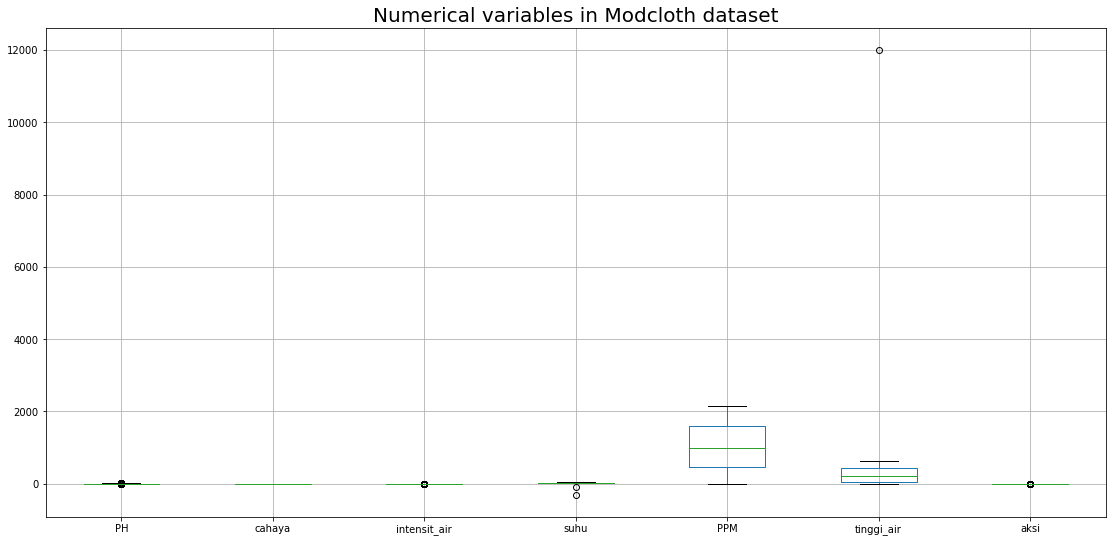

In [ ]:
num_cols = ['PH', 'cahaya', 'intensit_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

## 7. Visualisasikan Tiap feature dengan label

In [ ]:
#Isi Code

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [ ]:
#Isi Kode

## 9. Buat model ANN

In [ ]:
#Isi Code

## 10. Build Model KNN